# Regressão Logística

É uma técnica estatística usada para modelar e prever a probabilidade de um evento binário ocorrer (por exemplo, sucesso/falha). Diferente da Regressão Linear, que é usada para variáveis dependentes contínuas, ou seja, valores contínuos, a Regressão Logística é usada para variáveis dependentes categóricas. É especialmente útil para problemas de classificação binária (por exemplo, se um e-mail é spam ou não).

**Principais Conceitos**

* **Função Sigmoid:** Transforma a saída linear em uma probabilidade entre 0 e 1. $$ \sigma(z) = \frac{1}{1 + e^{-z}} $$
* **Log Loss (Entropia Cruzada):** Mede a divergência entre as previsões e os rótulos reais, sendo usada como a função de perda para otimização do modelo. $$ L(y, \hat{y}) = -\frac{1}{N} \sum_{i=1}^{N} [y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i)] $$

**Importar as Bibliotecas Necessárias**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score


**Carregar e Preparar os Dados**

In [2]:
# Exemplo com dataset genérico
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5]])
y = np.array([0, 0, 1, 1])

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Treinar o Modelo de Regressão Logística**

In [3]:
# Criar o modelo
model = LogisticRegression()

# Treinar o modelo
model.fit(X_train, y_train)

LogisticRegression()

**Fazer Previsões**

In [4]:
# Previsões com o conjunto de teste
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:,1]

**Avaliar o Modelo**

Acurácia: 0.00%
Matriz de Confusão:
 [[0 1]
 [0 0]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



C:\Users\Utente\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Utente\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Utente\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", l

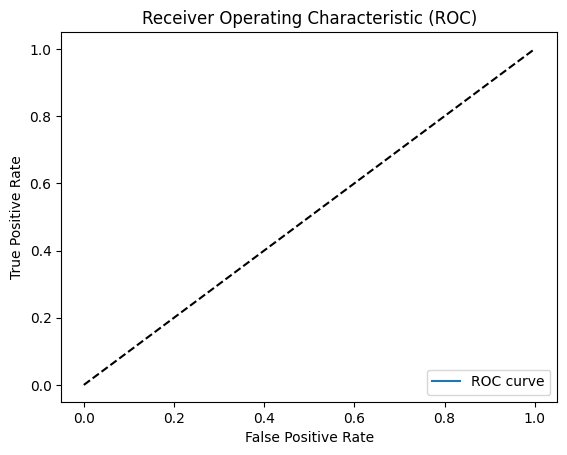

ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

In [5]:
# Acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy * 100:.2f}%")

# Matriz de Confusão
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:\n", conf_matrix)

# Relatório de Classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred))

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# AUC Score
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC Score: {auc:.2f}")


**Análise dos Resíduos**

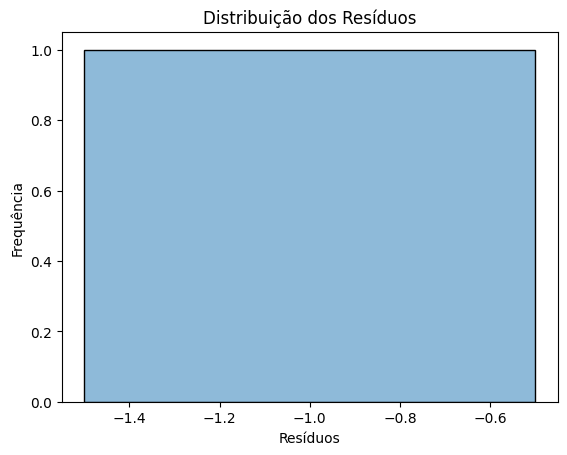

In [6]:
# Resíduos
residuals = y_test - y_pred

# Gráfico dos Resíduos
sns.histplot(residuals, kde=True)
plt.title('Distribuição dos Resíduos')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.show()


**❇️ Exemplo**

Dado uma base histórica com os resultados das últimas eleições, quais as probabilidades de novos candidatos serem eleitos?

In [7]:
base_historica = pd.read_csv('Eleicao.csv', sep = ';')
base_historica.head()

,CANDIDATO,SITUACAO,DESPESAS
0,George Turner,0,10
1,Victor Johnson,0,100
2,Jerry Perry,1,1600
3,Shirley Cook,1,1500
4,Carolyn Bailey,1,3300


In [8]:
base_historica.describe()

,SITUACAO,DESPESAS
count,47.000000,47.000000
mean,0.510638,1085.744681
std,0.505291,870.968338
min,0.000000,10.000000
25%,0.000000,300.000000
50%,1.000000,800.000000
75%,1.000000,1700.000000
max,1.000000,3300.000000


Plotar a visualização do Investimento c/ Foi Eleito (sim | não)

Text(0, 0.5, 'Foi Eleito: 0 = NÃO | 1 = SIM')

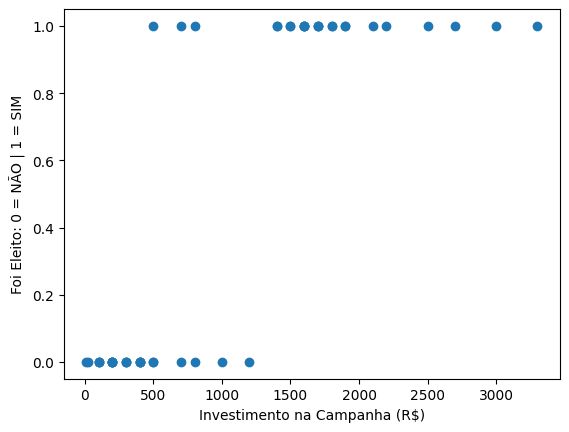

In [9]:
plt.scatter(base_historica.DESPESAS, base_historica.SITUACAO)
plt.xlabel('Investimento na Campanha (R$)')
plt.ylabel('Foi Eleito: 0 = NÃO | 1 = SIM')

↑ Considerações: repare que, a partir do valor de investimento de 1000 e poucos reais, o candidato autimaticamente é eleito, ou algumas 3 excessões.

Visualizar o Coeficiente de Correlação entre o atibuto "despesa" e "situação"

(Um coeficiente é um número que multiplica uma variável em uma equação, mostrando o quanto essa variável contribui para o resultado. É como se fosse a "força" de influência que uma coisa tem sobre outra em uma fórmula matemática.)

In [10]:
np.corrcoef(base_historica.DESPESAS, base_historica.SITUACAO)

array([[1.        , 0.81218717],
       [0.81218717, 1.        ]])

Criar a variável indepentende X e a variável dependente y

* Variável Independente (X): É como o botão de controle que você gira ou ajusta em um experimento para ver o que acontece. Por exemplo, quanto tempo você estuda.
* Variável Dependente (Y): É a resposta ou o resultado que você observa e mede em função das mudanças na variável independente. Por exemplo, a nota que você tira no teste.

In [11]:
X = base_historica.iloc[:, 2].values #Coluna DESPESAS
X

#De lista para matriz e adicionando uma nova coluna:
X = X[:, np.newaxis]
X

array([[  10],
       [ 100],
       [1600],
       [1500],
       [3300],
       [ 200],
       [1800],
       [1700],
       [ 300],
       [1800],
       [ 100],
       [ 500],
       [3000],
       [  20],
       [ 200],
       [ 700],
       [1600],
       [1900],
       [ 100],
       [ 400],
       [2700],
       [ 200],
       [ 300],
       [ 500],
       [2500],
       [1400],
       [ 700],
       [1700],
       [1400],
       [1600],
       [ 400],
       [ 200],
       [1600],
       [2200],
       [1900],
       [ 200],
       [1200],
       [1700],
       [1500],
       [2100],
       [ 400],
       [ 800],
       [ 400],
       [ 500],
       [1000],
       [ 300],
       [ 800]])

In [12]:
y = base_historica.iloc[:, 1].values #Coluna SITUACAO
y

array([0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1])

Criar e ajustar (fit) o modelo, treinamento e visualização dos coeficientes

In [13]:
modelo = LogisticRegression()
modelo.fit(X, y)

print('Coeficiente do Modelo:', modelo.coef_)
print('\nInterceptação do Modelo:', modelo.intercept_)
modelo

Coeficiente do Modelo: [[0.00498364]]

Interceptação do Modelo: [-4.60287217]


LogisticRegression()

Aplicando a Regressão Logística:

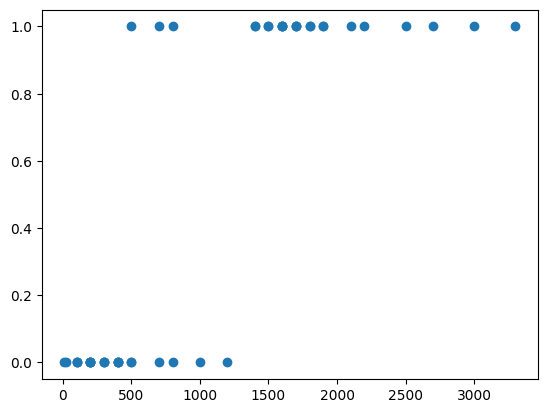

In [29]:
#Gerar o gráfico de disperão da base histórica apenas com as colunas Despesas(X) e Situação(y):
plt.scatter(X, y)

In [30]:
#Criar um array de 10 a 3000 com 100 elementos usando np.linspace para teste hipotético:
X_teste = np.linspace(10, 3000, 100) 
print(X_teste)

[  10.           40.2020202    70.4040404   100.60606061  130.80808081
  161.01010101  191.21212121  221.41414141  251.61616162  281.81818182
  312.02020202  342.22222222  372.42424242  402.62626263  432.82828283
  463.03030303  493.23232323  523.43434343  553.63636364  583.83838384
  614.04040404  644.24242424  674.44444444  704.64646465  734.84848485
  765.05050505  795.25252525  825.45454545  855.65656566  885.85858586
  916.06060606  946.26262626  976.46464646 1006.66666667 1036.86868687
 1067.07070707 1097.27272727 1127.47474747 1157.67676768 1187.87878788
 1218.08080808 1248.28282828 1278.48484848 1308.68686869 1338.88888889
 1369.09090909 1399.29292929 1429.49494949 1459.6969697  1489.8989899
 1520.1010101  1550.3030303  1580.50505051 1610.70707071 1640.90909091
 1671.11111111 1701.31313131 1731.51515152 1761.71717172 1791.91919192
 1822.12121212 1852.32323232 1882.52525253 1912.72727273 1942.92929293
 1973.13131313 2003.33333333 2033.53535354 2063.73737374 2093.93939394
 2124.1

In [ ]:
#Definir (criar manualmente) a FUNÇÃO Sigmoide:
## sigma(z) = \frac{1}{1 + e^{-z}}

def sigmoide(sigma):
    return 1 / (1 + np.exp(-sigma)) 

In [32]:
#Aplicar a FUNÇÃO criada acima:
### Pegar a matriz X_teste e multiplicar cada número com o coeficiente mais intercepção
### Coeficiente: é um número que multiplica uma variável em uma equação, mostrando o quanto essa variável contribui para o resultado. É como se fosse a "força" de influência que uma coisa tem sobre outra em uma fórmula matemática.)
### Intercepção: é o ponto onde uma linha ou curva cruza o eixo Y de um gráfico. Em outras palavras, é o valor de Y quando X é zero.
### Usar ravel para transformar de matriz para uma reta achatada contígua (lado a lado)

prever = sigmoide(X_teste * modelo.coef_ + modelo.intercept_).ravel() 
print(prever)


[0.01042534 0.01209828 0.01403587 0.01627866 0.01887297 0.02187153
 0.02533421 0.02932866 0.03393098 0.03922633 0.04530933 0.0522843
 0.06026523 0.06937524 0.07974549 0.09151347 0.10482023 0.11980673
 0.13660892 0.15535161 0.17614119 0.19905722 0.22414351 0.25139898
 0.2807693  0.31214018 0.34533322 0.3801055  0.4161534  0.45312104
 0.49061308 0.52821102 0.5654916  0.60204572 0.63749598 0.67151133
 0.70381779 0.73420457 0.76252571 0.78869765 0.81269371 0.83453642
 0.85428863 0.87204445 0.88792048 0.90204796 0.91456603 0.92561623
 0.93533823 0.94386662 0.95132871 0.95784313 0.96351907 0.96845597
 0.97274367 0.97646272 0.97968491 0.98247391 0.98488592 0.98697039
 0.98877065 0.99032461 0.99166535 0.99282164 0.99381851 0.99467769
 0.99541801 0.99605575 0.99660503 0.99707805 0.99748532 0.99783595
 0.99813779 0.99839759 0.99862119 0.99881363 0.99897924 0.99912175
 0.99924438 0.9993499  0.99944069 0.99951881 0.99958602 0.99964385
 0.9996936  0.99973641 0.99977323 0.99980491 0.99983217 0.99985

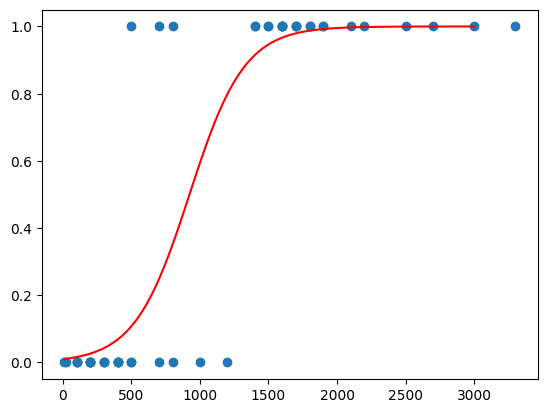

In [ ]:
# Juntar tudo e plotar a linha em formato de S ajustando os novos números de previsão-teste à base historica
plt.scatter(X, y)
plt.plot(X_teste, prever, color = 'red')

Carregar a base de Novos Candidados para prever possíveis resultados a partir da base histórica com a aplicação do modelo preditivo:


In [37]:
base_previsao = pd.read_csv('NovosCandidatos.csv', sep = ";")
base_previsao.head()

,CANDIDATO,DESPESAS
0,A,0
1,B,10
2,C,200
3,D,500
4,E,900


Transformar a base de previsão de tabela para matriz aplicável aos cálculos

In [43]:
despesa = base_previsao.iloc[:, 1].values
print("De linha:\n", despesa)

despesa = despesa.reshape(-1, 1)
#-1: Isso indica que o NumPy deve determinar automaticamente o número de linhas necessárias para manter o mesmo número de elementos do array original.
# 1: Isso indica que o array deve ter apenas uma coluna.
print("\nPara coluna:\n", despesa)

De linha:
 [   0   10  200  500  900 1500 3000]

Para coluna:
 [[   0]
 [  10]
 [ 200]
 [ 500]
 [ 900]
 [1500]
 [3000]]


Realizar, por fim, as previsões:
* `modelo`: Este é o modelo de machine learning que foi previamente treinado com os dados.
* `predict(despesa)`: A função predict é usada para fazer previsões com o modelo treinado usando os dados fornecidos, que neste caso são os dados contidos na variável despesa.
* `previsao_futura`: Esta é a variável que vai armazenar as previsões feitas pelo modelo.


In [44]:
previsao_futura = modelo.predict(despesa)
previsao_futura

array([0, 0, 0, 0, 0, 1, 1])

↑ Considerações: apenas os dois últimos candidatoes são previstos a ganhar as próximas eleições considerando a quantidade de dinheiro a ser investido

In [46]:
#Montar a tabela com as novas informações empilhando matrizes 1-D como colunas em uma matriz 2-D com np.column_stack
base_previsao = np.column_stack((base_previsao, previsao_futura))
base_previsao

array([['A', 0, 0, 0],
       ['B', 10, 0, 0],
       ['C', 200, 0, 0],
       ['D', 500, 0, 0],
       ['E', 900, 0, 0],
       ['F', 1500, 1, 1],
       ['G', 3000, 1, 1]], dtype=object)